# Loan Prediction

### Problem Statement

<b>Build a model to predict if a customer would be approved/rejected for a loan application based on
the details provided by him,These details are Gender, Marital Status, Education, Number of
Dependents, Income, Loan Amount, Credit History and others<b>

### Importing required packages

In [637]:
#import libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

#import libraries for data preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


#import libraries for Logistic Regression
from sklearn.linear_model import LogisticRegression


#import libraries for Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

#import libraries for Support Vector Machine
from sklearn.svm import SVC


#import libraries for Neural Network
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense


#import libraries for model evaluation
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
%matplotlib inline


import warnings
warnings.filterwarnings('ignore')

### Loading the Data Set

In [399]:
df = pd.read_csv("/home/sash/Documents/Assignment/data_set.csv")

In [400]:
print("Shape of dataset : ",df.shape)
df.head()

Shape of dataset :  (614, 13)


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


## Exploratory Data Analysis

#### Overall analysis

In [401]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [402]:
df.isnull().sum()  # check for the null value

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [403]:
print('Number of the columns having null values',df.isnull().any().sum())

Number of the columns having null values 7


In [404]:
print('Total number of null values',df.isnull().any(axis=1).sum())

Total number of null values 134


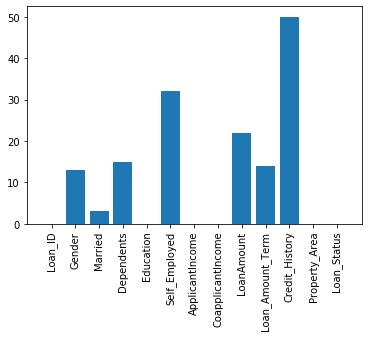

In [405]:
plt.bar(df.columns, df.isnull().sum())
plt.tick_params(axis= 'x', rotation=90)
plt.show()

### Let's first deal with the null values.
We drop the rows with null values, because giving loan to the customers is highly based on previous history etc. So it's better to drop the value rather than using incomplete values.

### Firstly dealing with numerical variables

In [406]:
df = df[~np.isnan(df['LoanAmount'])]
df = df[~np.isnan(df['Loan_Amount_Term'])]
df = df[~np.isnan(df['Credit_History'])]

### Now handling the categorical null values.
Firstly, we see the count per feature

In [407]:
print(df['Gender'].value_counts())
print(df['Married'].value_counts())
print(df['Dependents'].value_counts())
print(df['Self_Employed'].value_counts())

Male      422
Female     95
Name: Gender, dtype: int64
Yes    339
No     188
Name: Married, dtype: int64
0     295
2      92
1      85
3+     45
Name: Dependents, dtype: int64
No     434
Yes     70
Name: Self_Employed, dtype: int64


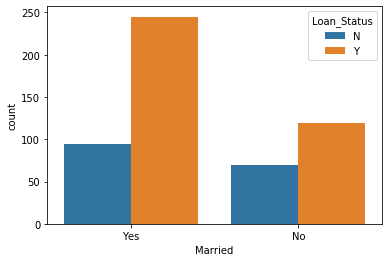

In [408]:
sns.countplot(data=df , x='Married', hue = 'Loan_Status')

It's seems that people who are married gets more loan than unmarried

In [409]:
df['Married'].fillna('Yes', inplace=True)

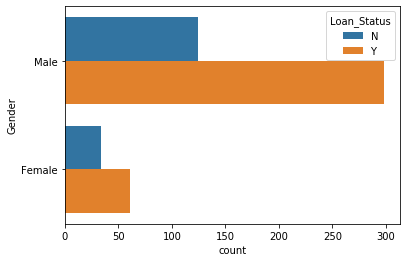

In [410]:
sns.countplot( y= 'Gender', data = df, hue="Loan_Status")

In [411]:
df['Gender'].fillna('Male', inplace= True)

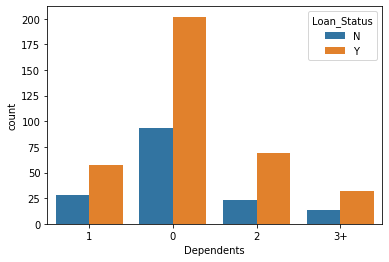

In [412]:
sns.countplot(data=df, x = 'Dependents', hue= "Loan_Status")

In [413]:
df['Dependents'].fillna('0', inplace =True)

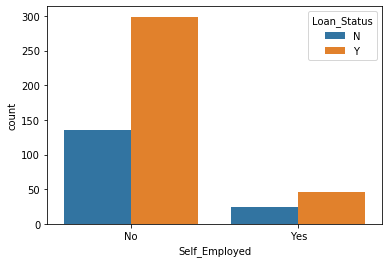

In [414]:
sns.countplot(data= df, x= 'Self_Employed', hue= 'Loan_Status')

In [415]:
df['Self_Employed'].fillna('No', inplace = True)

In [416]:
df.describe() 

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,529.000000,529.000000,529.000000,529.000000,529.000000
mean,5507.822306,1542.394934,145.852552,342.351607,0.850662
std,6404.132369,2524.295797,84.108409,64.861662,0.356759
min,150.000000,0.000000,9.000000,36.000000,0.000000
25%,2900.000000,0.000000,100.000000,360.000000,1.000000
50%,3816.000000,1086.000000,128.000000,360.000000,1.000000
75%,5815.000000,2232.000000,167.000000,360.000000,1.000000
max,81000.000000,33837.000000,700.000000,480.000000,1.000000


We can see that there is lot difference between the value 25%,50%,75% from mean value in few of the feature, therefore there are outliers in those feature.

Understanding distribution the of Numerical Features

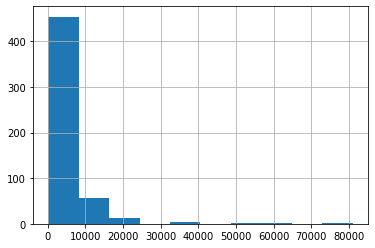

In [417]:
df['ApplicantIncome'].hist() #histogram of the feature Applicant Income

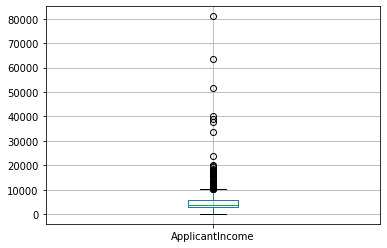

In [418]:
df.boxplot(column='ApplicantIncome')

The above Box Plot confirms the presence of a lot of outliers/extreme values. This can be attributed to the income disparity in the society. 

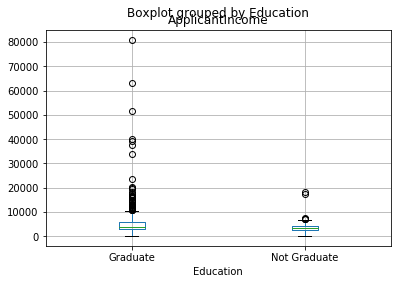

In [419]:
df.boxplot(column='ApplicantIncome', by='Education')

Not much diference between the mean-value of graduate and non-graduate. But those who are graduate have high income, which are appearing to be outliers.

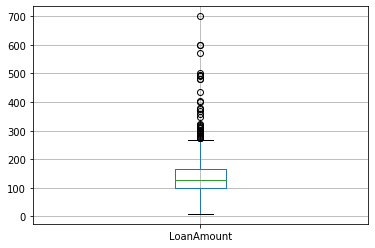

In [420]:
df.boxplot(column='LoanAmount')

Loan Amount has lot of outliers.

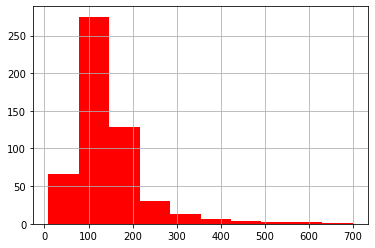

In [421]:
df['LoanAmount'].hist(color = 'red')

In [422]:
#combining the Applicant and Co-Applicant Income
df['TotalIncome'] = pd.DataFrame(df['ApplicantIncome'] + df['CoapplicantIncome']) 

In [423]:
df = df.drop(['ApplicantIncome', 'CoapplicantIncome'], axis=1)

In [424]:
print('Number of rows and columns:',df.shape)

Number of rows and columns: (529, 12)


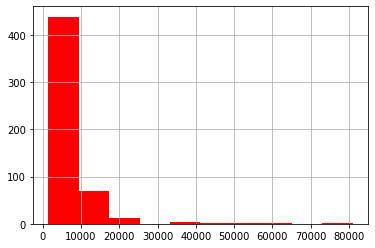

In [425]:
df['TotalIncome'].hist(color='Red')

We can see that total income is between 1000 to 10000, also data is spread onn the right hand side i.e between 40000 to 80000.

People usually apply for loan amount approximately between 90 to 140. Here also the data is spread on the right hand side approximately between 430 to 700.  

In [426]:
num_df = df._get_numeric_data()
num_df.head()

,LoanAmount,Loan_Amount_Term,Credit_History,TotalIncome
1,128.0,360.0,1.0,6091.0
2,66.0,360.0,1.0,3000.0
3,120.0,360.0,1.0,4941.0
4,141.0,360.0,1.0,6000.0
5,267.0,360.0,1.0,9613.0


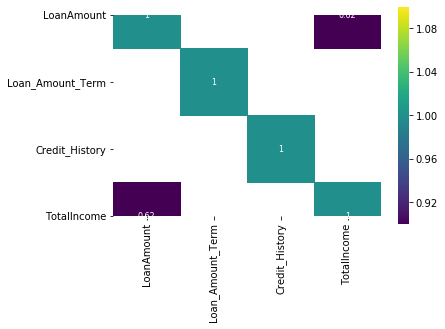

In [427]:
corr = num_df.corr()
sns.heatmap(corr[(corr >= 0.5)], cmap = 'viridis', vmax = 1.0, vmin = 1.0, annot = True, square=True, 
            annot_kws={'size':8})

The relationship between TotalIncome and LoanAmount is pretty good. The whitspace indicate that there is no relationship between the variables.


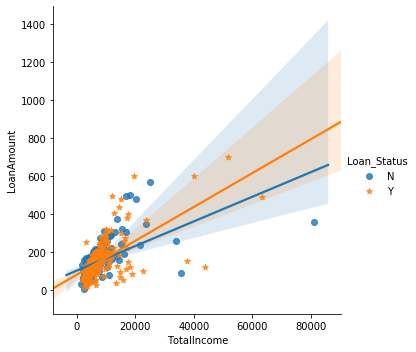

In [428]:
sns.lmplot(data=df, x='TotalIncome', y='LoanAmount', hue='Loan_Status', markers=['o', '*'])

As TotalIncome increases LoanAmount also increase i.e. TotalIncome is approximately directly proportional to LoanAmount

In [429]:
df['Loan_Status']=pd.get_dummies(df['Loan_Status'], drop_first=True) #converting categorical variable to numerical
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome
1,LP001003,Male,Yes,1,Graduate,No,128.0,360.0,1.0,Rural,0,6091.0
2,LP001005,Male,Yes,0,Graduate,Yes,66.0,360.0,1.0,Urban,1,3000.0
3,LP001006,Male,Yes,0,Not Graduate,No,120.0,360.0,1.0,Urban,1,4941.0
4,LP001008,Male,No,0,Graduate,No,141.0,360.0,1.0,Urban,1,6000.0
5,LP001011,Male,Yes,2,Graduate,Yes,267.0,360.0,1.0,Urban,1,9613.0


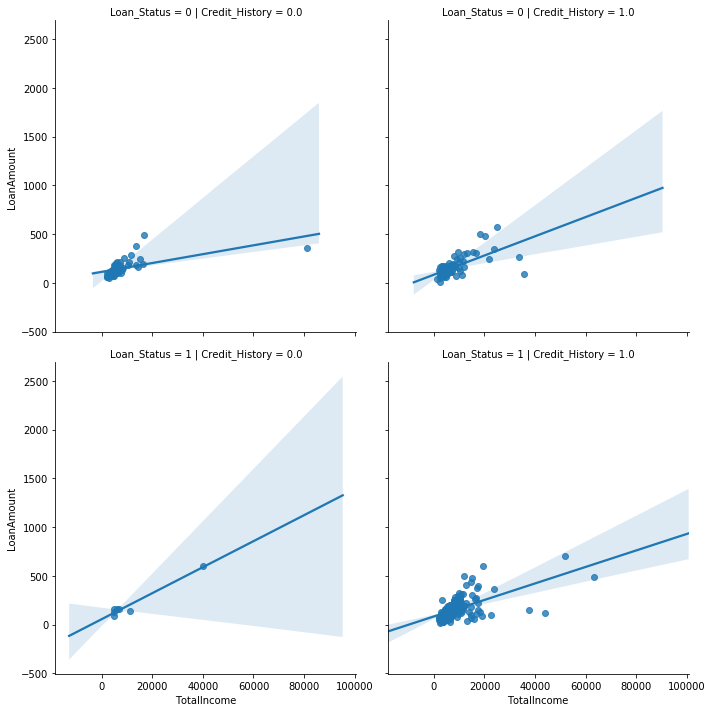

In [430]:
sns.lmplot(data=df ,x="TotalIncome" , y = "LoanAmount" ,row='Loan_Status', col = "Credit_History")

Credit History plays a vital role in approval of the Loan.

Let's see how education and gender affects the approval of the loan.

In [431]:
df1 = df[['Education','Gender','Loan_Status']]
df1 = pd.concat([df1['Education'].str.cat(df1['Gender'], sep=', '), df1['Loan_Status']], axis=1)
df1.head()

,Education,Loan_Status
1,"Graduate, Male",0
2,"Graduate, Male",1
3,"Not Graduate, Male",1
4,"Graduate, Male",1
5,"Graduate, Male",1


In [432]:
df1 = df1[df1['Loan_Status']==1]
df1.head()

,Education,Loan_Status
2,"Graduate, Male",1
3,"Not Graduate, Male",1
4,"Graduate, Male",1
5,"Graduate, Male",1
6,"Not Graduate, Male",1


In [433]:
df1 = df1.Education.value_counts().to_frame()

In [434]:
df1.rename(columns={'Education':'Frequency'}, inplace=True)
df1.index.name = "Demographic"
df1.head()

,Frequency
Demographic,
"Graduate, Male",249
"Not Graduate, Male",56
"Graduate, Female",50
"Not Graduate, Female",11


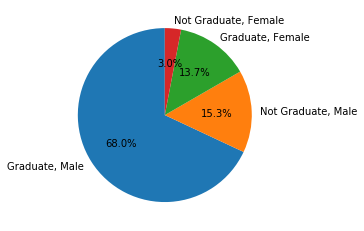

In [435]:
demo = df1.index
freq = df1.Frequency
plt.pie(freq, labels=demo, startangle=90, autopct="%0.1f%%")
plt.show()

Education does impact the approval of the loan i.e. graduate have higher chances than non-graduate. We observe that male graduate have higher percentage of approval of the loan than the female graduate.


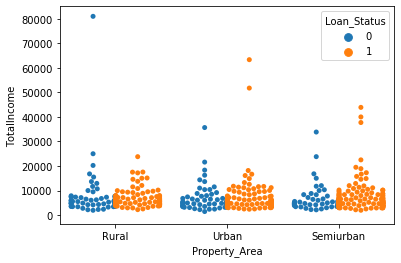

In [436]:
sns.swarmplot(data=df, x='Property_Area', y='TotalIncome', hue='Loan_Status', dodge=True) #checking with property area.

TotalIncome doesnot have any impact on the location of the property area.   

Features in dataset

In [437]:
df.Loan_Status.value_counts() #checking for the class balance

1    366
0    163
Name: Loan_Status, dtype: int64

## Data Preprocessing

In [438]:
df_x = df
df_x = df_x.drop(['Loan_ID', 'Loan_Status'], axis=1)
df_x.head()

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,TotalIncome
1,Male,Yes,1,Graduate,No,128.0,360.0,1.0,Rural,6091.0
2,Male,Yes,0,Graduate,Yes,66.0,360.0,1.0,Urban,3000.0
3,Male,Yes,0,Not Graduate,No,120.0,360.0,1.0,Urban,4941.0
4,Male,No,0,Graduate,No,141.0,360.0,1.0,Urban,6000.0
5,Male,Yes,2,Graduate,Yes,267.0,360.0,1.0,Urban,9613.0


Now handling the categorical variable's value for the model.

Applying the log function will remove the skewness of data and will make it normal. As total income is skewed i have applied log of that which makes it normal so that many machine learning algorithms can be applied smoothly. 

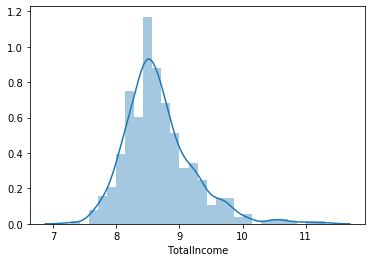

In [439]:
df_x['TotalIncome'] = np.log(df_x['TotalIncome'])
sns.distplot(df_x['TotalIncome'])

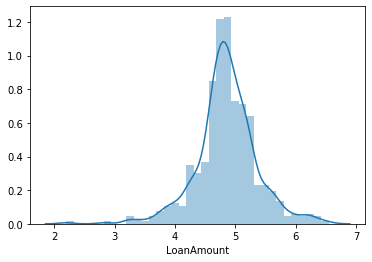

In [440]:
df_x['LoanAmount'] = np.log(df_x['LoanAmount'])
sns.distplot(df_x['LoanAmount'])

### Handling Categorical variables with LabelEncoder.

In [442]:
cat_cols = ['Gender', 'Married', 'Education', 'Dependents', 'Property_Area', 'Self_Employed']
for n in cat_cols:
    label = LabelEncoder()
    df_x[n] = label.fit_transform(df_x[n].astype('str'))
    
df_x.head()

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,TotalIncome
1,1,1,1,0,0,4.852030,360.0,1.0,0,8.714568
2,1,1,0,0,1,4.189655,360.0,1.0,2,8.006368
3,1,1,0,1,0,4.787492,360.0,1.0,2,8.505323
4,1,0,0,0,0,4.948760,360.0,1.0,2,8.699515
5,1,1,2,0,1,5.587249,360.0,1.0,2,9.170872


In [444]:
df_y = df[['Loan_Status']] # dependent variable

### Train and Test Split of dataset

In [588]:
x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.4, random_state= 4)

In [589]:
print('Number of data points in train data:', x_train.shape[0])
print('Number of data points in test data:', x_test.shape[0])

Number of data points in train data: 317
Number of data points in test data: 212


# Model Building

#### What is Model Evaluation?
Model Evaluation is an integral part of the model development process. It helps to find the best model that represents our data and how well the chosen model will work in the future

Models which are used in this projects are:

<b>1)Logistic Regression <br>
2)Support Vector Machine <br>
3)Random Forest Classifier <br>
4)ANN    

Model will be evaluated on the basis of parameters:

1) Accuracy_Score <br>
2) Precision <br>
3) Recall <br>
4) F1-score <br>

## Logistic Regression

In [590]:
logmodel = LogisticRegression()

In [591]:
logmodel.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [592]:
y_pred = logmodel.predict(x_test)

In [593]:
# Accuracy of the Model
accu1 = accuracy_score(y_test,y_pred)*100
print('Accuracy of the Model is:', acuu1)

Accuracy of the Model is: 81.13207547169812


In [594]:
cLR = confusion_matrix(y_test,y_pred)
conf1 = pd.DataFrame(cLR,columns=['Predict_N', 'Predict_Y'], index=['Actual_N', 'Actual_Y'])
conf1

,Predict_N,Predict_Y
Actual_N,32,37
Actual_Y,3,140


In [595]:
tn1, fp1, fn1, tp1 = confusion_matrix(y_test, y_pred).ravel()

In [596]:
#Precision and Recall
p1 = tp1/(tp1 + fp1)
r1 = tp1/(tp1 + fn1)

print('Precision is:', p1)
print('Recall is:', r1)

Precision is: 0.7909604519774012
Recall is: 0.9790209790209791


In [597]:
LR_f1 = f1_score(y_test,y_pred)
print('The F1 score for Logistic Regression is:',LR_f1)

The F1 score for Logistic Regression is: 0.8750000000000001


## Support Vector Machine

In [602]:
model2 = SVC(kernel = 'poly', random_state=8)
model2.fit(x_train, y_train)

y_pred2 = model2.predict(x_test)

In [603]:
accu2 = accuracy_score(y_test, y_pred2)*100
print('The accuracy of the model is:', accu2)

The accuracy of the model is: 81.60377358490565


In [604]:
cSVM = confusion_matrix(y_test,y_pred2)
conf2 = pd.DataFrame(cSVM,columns=['Predict_N', 'Predict_Y'], index=['Actual_N', 'Actual_Y'])
conf2

,Predict_N,Predict_Y
Actual_N,34,35
Actual_Y,4,139


In [605]:
tn2, fp2, fn2, tp2 = confusion_matrix(y_test, y_pred2).ravel()

In [606]:
#Precision and Recall
p2 = tp2/(tp2 + fp2)
r2 = tp2/(tp2 + fn2)

print('Precision is:', p2)
print('Recall is:', r2)

Precision is: 0.7988505747126436
Recall is: 0.972027972027972


In [607]:
SVM_f1 = f1_score(y_test, y_pred2)
print('The F1 score for SVM is:', SVM_f1)

The F1 score for SVM is: 0.8769716088328076


## Random Forest Classifier

In [608]:
model3 = RandomForestClassifier()
model3.fit(x_train, y_train)

y_pred3 = model3.predict(x_test)

In [609]:
# Accuracy of the Random Forest model
accu3 = accuracy_score(y_test, y_pred3)*100
print("The accuracy of the model is:", accu3)

The accuracy of the model is: 80.18867924528303


In [610]:
cRFC = confusion_matrix(y_test,y_pred3)
conf3 = pd.DataFrame(cRFC,columns=['Predict_N', 'Predict_Y'], index=['Actual_N', 'Actual_Y'])
conf3

,Predict_N,Predict_Y
Actual_N,38,31
Actual_Y,11,132


In [611]:
tn3, fp3, fn3, tp3 = confusion_matrix(y_test, y_pred3).ravel()

In [612]:
#Precision and Recall
p3 = tp3/(tp3 + fp3)
r3 = tp3/(tp3 + fn3)

print('Precision is:', p3)
print('Recall is:', r3)

Precision is: 0.8098159509202454
Recall is: 0.9230769230769231


In [613]:
RFC_f1 = f1_score(y_test, y_pred3)
print('The F1 score for RFC is:', RFC_f1)

The F1 score for RFC is: 0.8627450980392156


#### Feature Importance

In [640]:
features = pd.DataFrame()
features['Feature'] = x_train.columns
features['Importance'] = model3.feature_importances_
features.sort_values(by=['Importance'], ascending=False, inplace=True)
features.set_index('Feature', inplace=True)

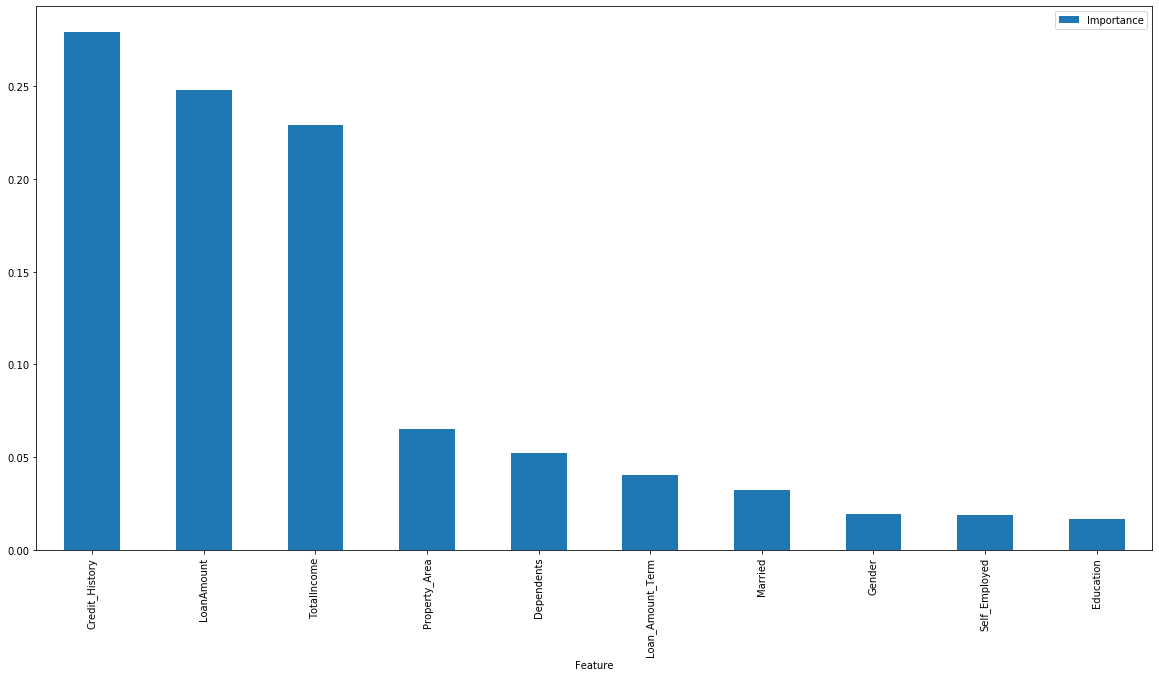

In [641]:
features.plot(kind='bar', figsize=(20, 10))

## ANN

In [638]:
model4 = Sequential()
model4.add(Dense(units=40, activation='relu', input_dim=10))
model4.add(Dense(units=40, activation='relu'))
model4.add(Dense(units=2, activation='softmax'))

In [615]:
X1_scaler = StandardScaler().fit(x_train)
X1_train_scaled = X1_scaler.transform(x_train)
X1_test_scaled = X1_scaler.transform(x_test)

In [616]:
label1_encoder = LabelEncoder()
label1_encoder.fit(y1_train)
y1_train = label1_encoder.transform(y_train)
y1_test = label1_encoder.transform(y_test)

# Convert encoded labels to one-hot-encoding
y1_train_categorical = to_categorical(y1_train)
y1_test_categorical = to_categorical(y1_test)

Train on 317 samples, validate on 212 samples
Epoch 1/200
 - 0s - loss: 0.8813 - accuracy: 0.3533 - val_loss: 0.7923 - val_accuracy: 0.4528
Epoch 2/200
 - 0s - loss: 0.7680 - accuracy: 0.4196 - val_loss: 0.7232 - val_accuracy: 0.4387
Epoch 3/200
 - 0s - loss: 0.7020 - accuracy: 0.5047 - val_loss: 0.6837 - val_accuracy: 0.5236
Epoch 4/200
 - 0s - loss: 0.6617 - accuracy: 0.5899 - val_loss: 0.6601 - val_accuracy: 0.6085
Epoch 5/200
 - 0s - loss: 0.6362 - accuracy: 0.6656 - val_loss: 0.6449 - val_accuracy: 0.6557
Epoch 6/200
 - 0s - loss: 0.6185 - accuracy: 0.6940 - val_loss: 0.6348 - val_accuracy: 0.6745
Epoch 7/200
 - 0s - loss: 0.6053 - accuracy: 0.7066 - val_loss: 0.6271 - val_accuracy: 0.6887
Epoch 8/200
 - 0s - loss: 0.5948 - accuracy: 0.7129 - val_loss: 0.6209 - val_accuracy: 0.6887
Epoch 9/200
 - 0s - loss: 0.5868 - accuracy: 0.7161 - val_loss: 0.6156 - val_accuracy: 0.6887
Epoch 10/200
 - 0s - loss: 0.5786 - accuracy: 0.7192 - val_loss: 0.6107 - val_accuracy: 0.6887
Epoch 11/200


Epoch 87/200
 - 0s - loss: 0.4229 - accuracy: 0.8170 - val_loss: 0.5158 - val_accuracy: 0.8066
Epoch 88/200
 - 0s - loss: 0.4222 - accuracy: 0.8170 - val_loss: 0.5159 - val_accuracy: 0.8066
Epoch 89/200
 - 0s - loss: 0.4215 - accuracy: 0.8202 - val_loss: 0.5159 - val_accuracy: 0.8066
Epoch 90/200
 - 0s - loss: 0.4210 - accuracy: 0.8170 - val_loss: 0.5160 - val_accuracy: 0.8066
Epoch 91/200
 - 0s - loss: 0.4209 - accuracy: 0.8170 - val_loss: 0.5160 - val_accuracy: 0.8066
Epoch 92/200
 - 0s - loss: 0.4203 - accuracy: 0.8170 - val_loss: 0.5161 - val_accuracy: 0.8066
Epoch 93/200
 - 0s - loss: 0.4195 - accuracy: 0.8170 - val_loss: 0.5162 - val_accuracy: 0.8066
Epoch 94/200
 - 0s - loss: 0.4193 - accuracy: 0.8170 - val_loss: 0.5162 - val_accuracy: 0.8066
Epoch 95/200
 - 0s - loss: 0.4186 - accuracy: 0.8170 - val_loss: 0.5164 - val_accuracy: 0.8066
Epoch 96/200
 - 0s - loss: 0.4181 - accuracy: 0.8170 - val_loss: 0.5164 - val_accuracy: 0.8066
Epoch 97/200
 - 0s - loss: 0.4178 - accuracy: 0.82

Epoch 173/200
 - 0s - loss: 0.3888 - accuracy: 0.8486 - val_loss: 0.5224 - val_accuracy: 0.8113
Epoch 174/200
 - 0s - loss: 0.3888 - accuracy: 0.8486 - val_loss: 0.5223 - val_accuracy: 0.8066
Epoch 175/200
 - 0s - loss: 0.3882 - accuracy: 0.8486 - val_loss: 0.5224 - val_accuracy: 0.8066
Epoch 176/200
 - 0s - loss: 0.3883 - accuracy: 0.8486 - val_loss: 0.5225 - val_accuracy: 0.8066
Epoch 177/200
 - 0s - loss: 0.3878 - accuracy: 0.8486 - val_loss: 0.5226 - val_accuracy: 0.8066
Epoch 178/200
 - 0s - loss: 0.3872 - accuracy: 0.8486 - val_loss: 0.5226 - val_accuracy: 0.8066
Epoch 179/200
 - 0s - loss: 0.3871 - accuracy: 0.8486 - val_loss: 0.5228 - val_accuracy: 0.8066
Epoch 180/200
 - 0s - loss: 0.3869 - accuracy: 0.8486 - val_loss: 0.5228 - val_accuracy: 0.8066
Epoch 181/200
 - 0s - loss: 0.3863 - accuracy: 0.8486 - val_loss: 0.5229 - val_accuracy: 0.8066
Epoch 182/200
 - 0s - loss: 0.3860 - accuracy: 0.8486 - val_loss: 0.5230 - val_accuracy: 0.8066
Epoch 183/200
 - 0s - loss: 0.3860 - acc

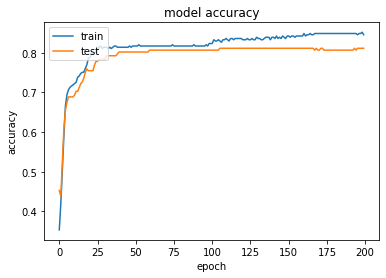

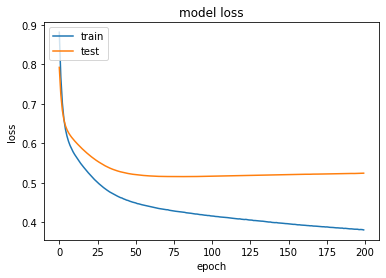

In [617]:
model4.compile(optimizer='SGD', 
              loss='binary_crossentropy', 
              metrics=['accuracy'])
history = model4.fit(
    X1_train_scaled,
    y1_train_categorical,
    epochs=200,
    shuffle=True,
    verbose=2,validation_data=(X1_test_scaled,y1_test_categorical))
	
import matplotlib.pyplot as plt
model4.metrics_names
print(history.history.keys())
#  "Accuracy" plot
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()
# 'loss' plot
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

In [631]:
model4_loss, accu4 = model4.evaluate(X1_test_scaled, y1_test_categorical, verbose=2)
print(f"Normal Neural Network with data - Loss: {model4_loss}, Accuracy: {accu4*100}")


Normal Neural Network with data - Loss: 0.5244014690507133, Accuracy: 81.13207817077637


In [619]:
cLR = confusion_matrix(y_test,y_pred)
conf1 = pd.DataFrame(c,columns=['Predict_N', 'Predict_Y'], index=['Actual_N', 'Actual_Y'])
conf1

,Predict_N,Predict_Y
Actual_N,32,37
Actual_Y,3,140


In [620]:
cANN = confusion_matrix(y1_test,model4.predict_classes(X1_test_scaled))
conf4 = pd.DataFrame(cANN,columns=['Predict_N', 'Predict_Y'], index=['Actual_N', 'Actual_Y'])
conf4

,Predict_N,Predict_Y
Actual_N,33,36
Actual_Y,4,139


In [621]:
tn4, fp4, fn4, tp4 = confusion_matrix(y1_test,model4.predict_classes(X1_test_scaled)).ravel()

In [622]:
#Precision and Recall
p4 = tp4/(tp4 + fp4)
r4 = tp4/(tp4 + fn1)

print('Precision is:', p4)
print('Recall is:', r4)

Precision is: 0.7942857142857143
Recall is: 0.9788732394366197


In [623]:
ANN_f1 = f1_score(y1_test,model4.predict_classes(X1_test_scaled))
print(f"The F1_score of the ANN is: {ANN_f1}.")

The F1_score of the ANN is: 0.8742138364779874.


### Compare the result of the performance

In [636]:
result = pd.DataFrame(pd.DataFrame(np.array([[p1,r1, accu1, LR_f1],[p2, r2, accu2, SVM_f1],[p3, r3, accu3, RFC_f1], [p4, r4, accu4*100, ANN_f1]]),
                                   columns = ["Precision","Recall", "Accuracy","F1-score"], index = ["Logistic_Regression", "Support Vector Machine", "Random Forest Classifier", "Artificial Neural Network"]))

result

,Precision,Recall,Accuracy,F1-score
Logistic_Regression,0.790960,0.979021,81.132075,0.875000
Support Vector Machine,0.798851,0.972028,81.603774,0.876972
Random Forest Classifier,0.809816,0.923077,80.188679,0.862745
Artificial Neural Network,0.794286,0.978873,81.132078,0.874214


As we can see from the above Dataframe of the performance metrics of 4 models.

# Conclusion
We observe that performance of the Support Vector Machine model with kernel as polynomial is better than the other models, but it is little bit slow as compare with Logistic Model.
We can see from the above score ANN model and Logistic Model are pretty close too.

The accuracy of ANN may increase if we have more data, this will help in better learning of the model, then ANN may give better result.
Although, <b>Logistic Regression</b> seems better for this dataset even if SVM accuracy is <b>slightly higher</b> because it is <b>slow</b>.

#### Author: Sashwat Sharma 
#### Email: sashwatiiitdwd@gmail.com
#### Mobile No. : 7019455702